# Load traffic data

In [28]:
import pandas as pd
import numpy as np
import datetime

from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colrs

plt.rcParams['font.size'] = 18

## Constants

In [12]:
cities_dims = {
    'Bordeaux': (334, 342),
    'Clermont-Ferrand': (208, 268),
    'Dijon': (195, 234),
    'France': (9742, 9588),
    'Grenoble': (409, 251),
    'Lille': (330, 342),
    'Lyon': (426, 287),
    'Mans': (228, 246),
    'Marseille': (211, 210),
    'Metz': (226, 269),
    'Montpellier': (334, 327),
    'Nancy': (151, 165),
    'Nantes': (277, 425),
    'Nice': (150, 214),
    'Orleans': (282, 256),
    'Paris': (409, 346),
    'Rennes': (423, 370),
    'Rouen': (327, 373),
    'Saint-Etienne': (305, 501),
    'Strasbourg': (296, 258),
    'Toulouse': (280, 347),
    'Tours': (251, 270)
    }

## Load data

In [23]:
# let's load data from March 16th, 2019 on Lyon for the mobile service YouTube
day_str = '20190316'
city_str = 'Lyon'
app_str = 'YouTube'

# downlink and uplink traffic files
traffic_file_dn = f'./data/{city_str}_{app_str}_{day_str}_DL.txt'
traffic_file_up = f'./data/{city_str}_{app_str}_{day_str}_UL.txt'

# let's make a list of 15 min time intervals to use as column names
day = datetime.datetime.strptime(day_str, '%Y%m%d')
times = [day + datetime.timedelta(minutes=15*i) for i in range(96)]
times_str = [t.strftime('%H:%M') for t in times]

# column names
columns = ['tile_id'] + times_str

# let's load the data of the downlink traffic
df_traffic_dn = pd.read_csv(traffic_file_dn, sep=' ', names=columns)
df_traffic_dn.head()

tile_id  00:00  00:15  00:30  00:45  01:00  01:15  01:30  01:45  02:00   
0       66   6218   4701   6009   5745   4556   3928   2500   1885   2422  \
1      353   7591   4633   6074   5492   4570   4390   2415   1990   2555   
2      354   5548   4357   5449   5139   4166   3751   2311   1983   2700   
3      640   7763   3822   4785   4131   3546   4125   1816   1791   2287   
4      641   5663   4389   5167   5115   4074   3793   2256   2089   2805   

   ...  21:30  21:45  22:00  22:15  22:30  22:45  23:00  23:15  23:30  23:45  
0  ...   6261   6778   6191   8334   9329   6942   8601   6516   4359   4370  
1  ...   6495   7170   6688   8815  11450   8248  10175   6841   4550   4635  
2  ...   6006   6197   5759   7557   8967   7096   7905   6166   3972   4059  
3  ...   5518   6244   5687   7107  10105   7170   9089   6001   3865   3959  
4  ...   5770   6116   5972   7209   8643   7231   7926   6192   3833   4005  

[5 rows x 97 columns]

### Matrix representation

In [24]:
# fetch the number of rows and columns of the city
n_rows, n_cols = cities_dims[city_str]

# create a 3D array to store the traffic values
# the first dimension is the time, the second and third are the rows and columns (spatial dimensions)
city_traffic = np.zeros((len(times_str), n_rows, n_cols))

# fill the array with the traffic values
for _, row in df_traffic_dn.iterrows():
    tile_id = row['tile_id']
    row_index = int(tile_id // n_cols)
    col_index = int(tile_id % n_cols)

    traffic_values = np.array(row[times_str])
    city_traffic[:, row_index, col_index] = traffic_values

## Plot the traffic map

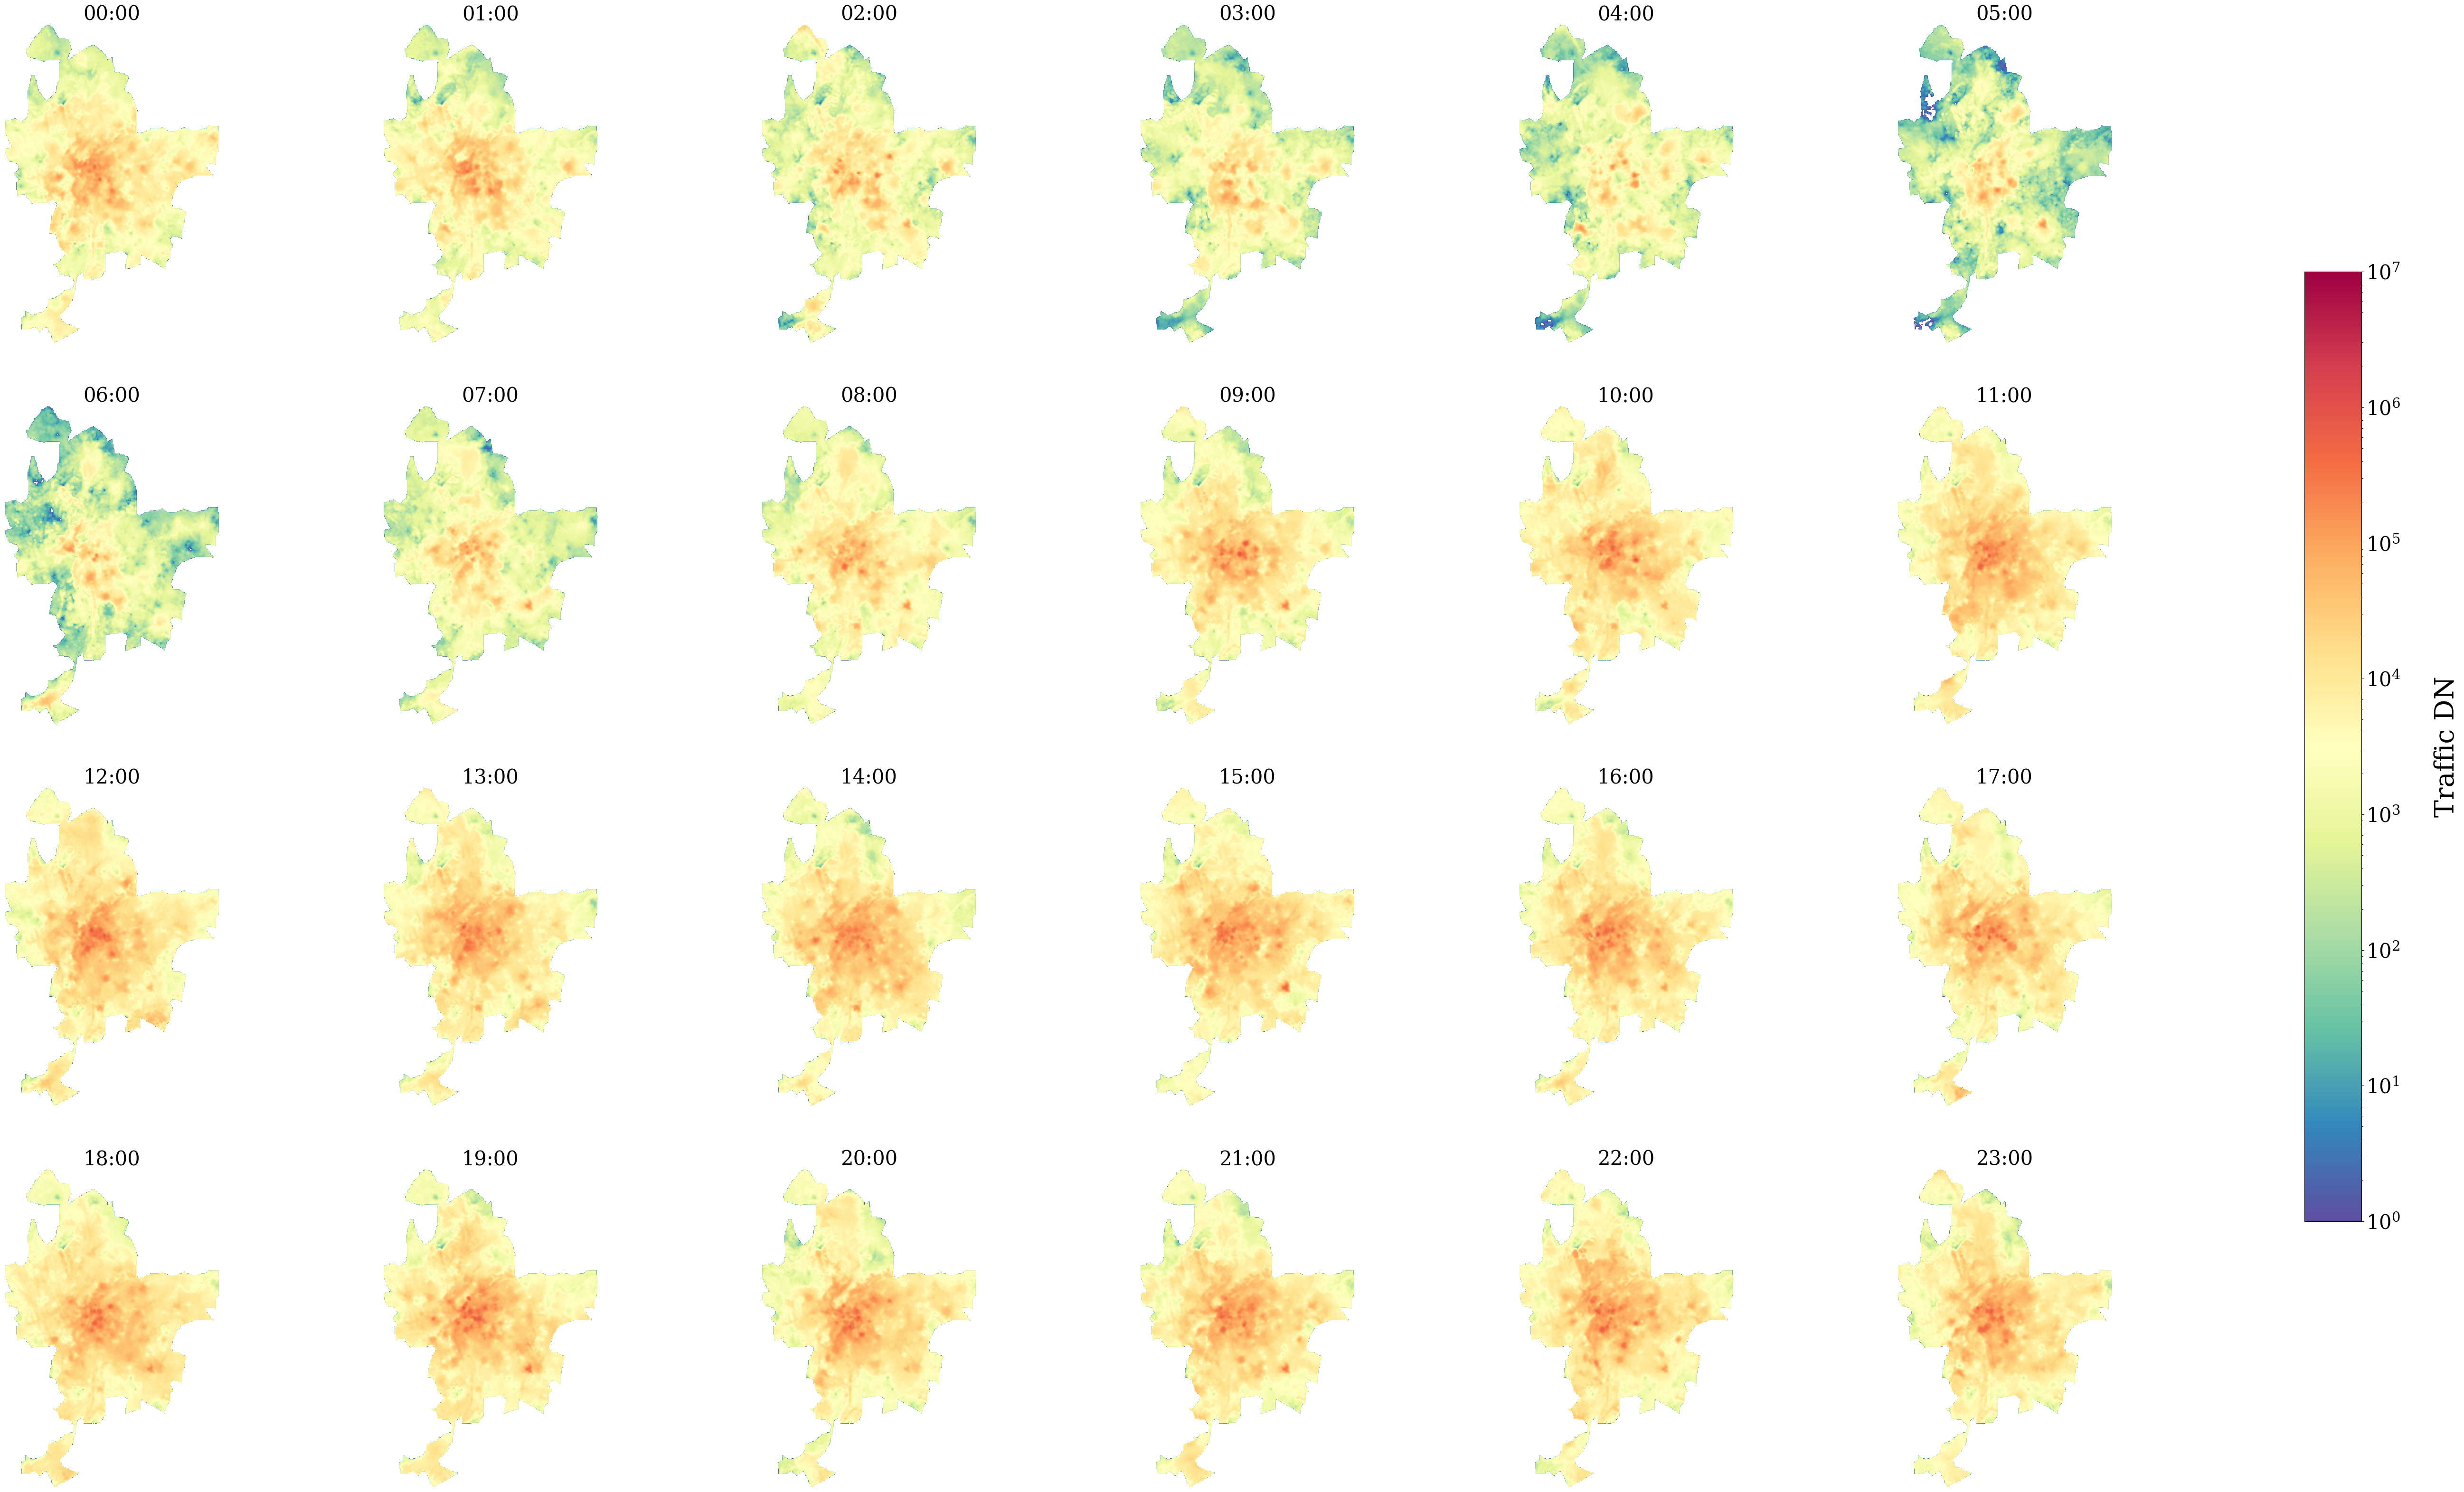

In [36]:
cmap_traffic = cm.get_cmap('Spectral_r').copy()
cmap_traffic.set_under('w', 0)
norm_traffic = colrs.LogNorm(vmin=1e0, vmax=1e7)

# let's plot the traffic map of the city for the first 15 min of each hour
fig, axs = plt.subplots(4, 6, figsize=(60, 40))
axs = axs.flatten()

for hour in range(24):
    ax = axs[hour]

    #recall that we have 15 min intervals, so we need to multiply the hour by 4
    city_traffic_time = city_traffic[ hour * 4 ] 

    ax.imshow(city_traffic_time, origin='lower', cmap=cmap_traffic, norm=norm_traffic)
    ax.set_title(f'{str(hour).zfill(2)}:00', fontsize=30)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

ax = fig.add_axes([0.95, 0.25, 0.02, .5])
sm = plt.cm.ScalarMappable(cmap=cmap_traffic, norm=norm_traffic)
sm.set_array([])
clb = plt.colorbar(sm, cax=ax, orientation='vertical') 
clb.set_label('Traffic DN', rotation=90, fontsize=40, labelpad=50)
clb.ax.tick_params(labelsize=30)
clb.ax.xaxis.set_ticks_position('default')

plt.show()